In [86]:
import pandas as pd
import numpy as np
import datetime
import os
import csv
# datetime_format
# df.inflected_time = pd.to_datetime(df.inflected_time, format="%Y/%m/%d")
# days = datetime.timedelta(days =4)


Find the dataframe that consists with the vital signs which record time is 3 days earlier than inflected time.

Find the patients are alived

In [ ]:
# xlsx to csv
ICU = os.listdir('ICU個案後台數據')
for pt_list in ICU :
    pt_dir = os.listdir('ICU個案後台數據/' + pt_list)
    for pt_data in pt_dir :
        print (pt_data)
#         if pt_data[-4:] == 'xlsx' :
#             path = 'ICU個案後台數據/' + pt_list + '/' + pt_data
#             data_xls = pd.read_excel( path , index_col=0)
#             data_xls.to_csv( path[:-4] + 'csv' , sep = '\t', encoding='utf-8')


In [88]:

path = 'ICU_data20200206'
icu = os.listdir(path)
for pt_dir in icu:    
    pt_info = [['time', 'hp', 'temp', 'move']]
    id_path = path + '/' + pt_dir
    pt_id = os.listdir(id_path)
    if pt_dir != '.ipynb_checkpoints':
        num = 2
        for pt_txt in pt_id:
            if pt_txt[-3:] == 'txt':  
                num+=1
                if num == 3:
                    date = '2020/02/03'
                elif num == 4:
                    date = '2020/02/04'
                else :
                    date = '2020/02/05'
                    
                txt_path = id_path + '/' + 'DH78_' + pt_dir + '_020' + str(num) + '.txt'
                with open( txt_path , 'r') as f:
                    for line in f.readlines():
                        line = line.strip('\n')
                        line = line.split(',')
                        pt_info.append(line)
        with open('ICU20200206/' + pt_dir + '_2020-0203,2020-0205' + '.csv', 'w', newline='') as csvfile:
            writer = csv.writer(csvfile)
            writer.writerows(pt_info)

In [207]:
df = pd.read_csv('00CE_2020-0203,2020-0205.csv',header=None)
df = df.drop(0)
df[4] = df[4].values.astype('int')
df[4] = [i/100 for i in df[4]]
tmp = df[4][(np.array(df[4])>25) & (np.array(df[4])<40)]
# df['ID']
len(tmp)


13223

In [220]:
np.linspace(1,11,12)#, 
np.array(np.linspace(7,18,12))

array([ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18.])

In [ ]:
pid_list = os.listdir('ICU20200206_date/')

for pid in pid_list:
    if 'check' not in pid:
        df = pd.read_csv('ICU20200206_date/' + pid, header = None)
        df = df.drop(0)
        df[1] = [datetime.datetime.strptime(i, '%Y/%m/%d') for i in df[1].values]
        df[2] = [datetime.datetime.strptime(i, '%H:%M:%S').time() for i in df[2].values]
        os.mkdir('ICU20200206_plot/' + pid[:4])

        date_list = list(dict.fromkeys(df[1].values))
        hour_list = np.arange(8,19) 
        for d_idx in range(len(date_list)):
            date = df[1].values
            d_filter = (date>=date_list[d_idx])&(date<(date_list[d_idx]+np.timedelta64(1,'D')))
            time_zone = 'From '+np.datetime_as_string(date_list[d_idx], unit = 'D')+' to '+np.datetime_as_string(date_list[d_idx]+np.timedelta64(1,'D'), unit = 'D')

            data = (df[4].values.astype('int'))[d_filter] #each date data
            hour = (df[2].values)[d_filter] #each date each hour
            data = [i/100 for i in data.astype('int')]
            data = np.asarray(data)

            each_hour = []
            for h_idx in hour_list:
                h_filter = (hour>=datetime.time(hour = h_idx))&(hour<datetime.time(hour = h_idx+1))
                tmp = data[(h_filter)&(np.array(data)>25)&(np.array(data)<45)]

                each_hour.append(tmp)

            plt.figure(figsize = (10,5))
            plt.plot(np.linspace(1,11,12), [35 for i in range(12)], 'g:')
            plt.boxplot(each_hour, flierprops  = dict(markerfacecolor = 'b', marker = '.'))
            plt.xticks(np.linspace(1,11,12), np.array(np.linspace(7,18,12), dtype = int))
            plt.xlabel('Hours')
            plt.ylabel('Temperature')
            plt.suptitle(time_zone)
            plt.savefig( 'ICU20200206_plot/' +  pid[:4] + '/' +  pid[:4] +' box plot '+time_zone+'.png', dpi = 300)
#             plt.show()
#     print(time_zone)


In [90]:
ptlist = os.listdir('Patient_01-09')
for i in range(len(ptlist)):
    for pos in range(len(ptlist[i])):
        if ptlist[i][pos] == "(":
            pid = ptlist[i][:pos]
            name = pid + "_" + ptlist[i][pos+10:]
            os.rename( 'Patient_01-09/' + ptlist[i],'Patient_01-09/' + name )
            
    ''' xlsx to csv , delete xlsx
    if i[-5:] == '.xlsx' :
        os.remove( 'Patient_01-09/' + i )
        data_xlsx = pd.read_excel( 'Patient_01-09/' + i)
        data_xlsx.to_csv( 'Patient_01-09/' + i[:-5] + '.csv' , sep=',', encoding='utf-8' )
    '''

In [91]:
#將多個csv彙整成一個
ptlist = os.listdir('Patient_01-09')
ptlist.sort()
for i in range(len(ptlist)) :
    if ptlist[i][-3:] == 'csv' : #確認是csv
        
        pt_reader = pd.read_csv( 'Patient_01-09/' + ptlist[i] )
        pt_data = [[],[],[],[],[]]
        num = 0
        for j in pt_reader:
            for k in pt_reader[str(j)] :
                pt_data[num].append(k)
            num+=1
        
        temp = 0 #同一病人檔案個數
        for j in range( len(ptlist)): #同個病人有幾個檔案
            if ptlist[i+j+1][:4] == ptlist[i][:4] :
                print (ptlist[i+j+1][:4])
                pt_reader_below = pd.read_csv( 'Patient_01-09/' + ptlist[i+j+1] )
                num = 0
                for title in pt_reader_below:
                    for k in pt_reader_below[str(title)] :
                        pt_data[num].append(k)
                    num+=1
                temp+=1
            else :
                break
        print (len(pt_data[3]))
        print ('temp: ' + str(temp))
        print ('num: ' + str(num))
        print ()
        i+=temp
    

0157
175509
temp: 1
num: 5

109420
temp: 0
num: 5

0159
514934
temp: 1
num: 5

240703
temp: 0
num: 5

0176
682495
temp: 1
num: 5

183096
temp: 0
num: 5

0185


IndexError: list index out of range

In [92]:
pt_reader = pd.read_csv( 'Patient_01-09/0185_2018-12-24to2018-12-26.csv',  header = None, index_col=False )
pt_reader.head()

,0,1,2,3,4,5
0,NaN,2018-12-24 00:00:00,10:10:00,0,3028,1
1,0.0,2018-12-24,10:10:01,0,3027,0
2,1.0,2018-12-24,10:10:02,0,3018,0
3,2.0,2018-12-24,10:10:03,0,3017,0
4,3.0,2018-12-24,10:10:04,0,3015,0


In [93]:
import matplotlib.pyplot as plt

pt3774 = pd.read_csv('ICU_data2020/1/3774_2020-01-04_10_to_2020-01-08_20_View.csv', header = None)
#0    1    2    3    4  
#日期 時間 脈搏 體溫 動作
#datax = [ pd.to_datetime(i, format='%H:%M:%S')  for i in pt3774[1] ]
datax = []
#datay = [ int(i)/100 for i in pt3774[3] ]
datay = []
for j in range(3600):
    data = str(pt3774[0][j]) + ' ' + str(pt3774[1][j])
    data = pd.to_datetime(data, format = '%Y-%m-%d %H:%M:%S' )
    datay.append(int(pt3774[3][j])/100 )
    datax.append(data)
# for i in range(100):
#     print (datay[i])

plt.style.use('ggplot')

plt.figure(figsize=(300,150))
plt.plot(np.array(datax)[(np.array(datay)<40) & (np.array(datay)>30) ]
         ,np.array(datay)[(np.array(datay)<40) & (np.array(datay)>30)]
         ,c='b')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('Temp', fontweight='bold')
plt.title('Patient3744', fontsize=15, fontweight='bold'  )
plt.xticks(rotation=45)
plt.show()

/home/math/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


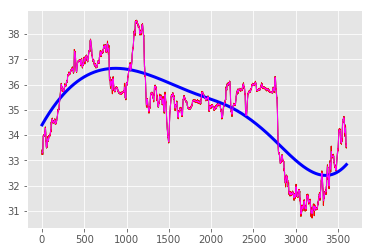

In [94]:
#from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np

from scipy import interpolate
from scipy import ndimage

x = np.linspace(1 ,len(datay) ,len(datay))

# convert both to arrays
x_sm = np.array(x)
y_sm = np.array(datay)

# resample to lots more points - needed for the smoothed curves
x_smooth = np.linspace(x_sm.min(), x_sm.max(), len(datay))

# spline - always goes through all the data points x/y
y_spline = interpolate.spline(x, datay, x_smooth)

spl = interpolate.UnivariateSpline(x, datay)

sigma = 2
x_g1d = ndimage.gaussian_filter1d(x_sm, sigma)
y_g1d = ndimage.gaussian_filter1d(y_sm, sigma)

#fig, ax = plt.subplots(figsize=(10, 10))
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

plt.plot(x_sm, y_sm, 'green', linewidth=1)
plt.plot(x_smooth, y_spline, 'red', linewidth=1)
plt.plot(x_smooth, spl(x_smooth), 'blue', linewidth=3)
plt.plot(x_g1d,y_g1d, 'magenta', linewidth=1)

plt.show()

In [95]:
criteria = np.array(datay)<40

In [96]:
data_before_conv = np.copy(datay)
data_after_conv = ndimage.gaussian_filter1d(data_before_conv, 20)

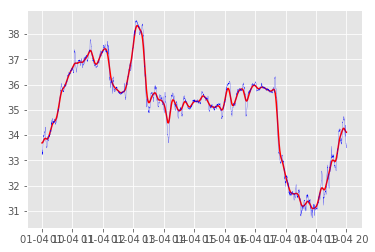

In [97]:
plt.plot(datax, data_after_conv, 'r')
plt.plot(datax, data_before_conv,'b', lw = 0.2)

In [98]:
def first_derivative(input_data, input_time):
    result = []
    for idx in range(len(input_data)-1): 
        result.append((input_data[idx+1]-input_data[idx])/
                      (datetime.datetime.strptime(str(input_time[idx+1]), '%Y-%m-%d %H:%M:%S' )
                       -datetime.datetime.strptime(str(input_time[idx]), '%Y-%m-%d %H:%M:%S')).total_seconds())
    result.append(result[-1])
    return np.array(result)

array([ 0.012,  0.006, -0.019, ..., -0.001,  0.012,  0.012])

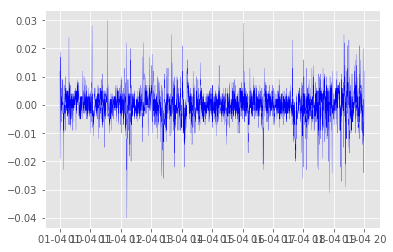

In [99]:

before_con_first_deri = first_derivative(datay, datax)
plt.plot(datax, before_con_first_deri,'b', lw = 0.2)
before_con_first_deri

1339.0
1132.0
414.0
351.0
109.0
0.00799999999999997


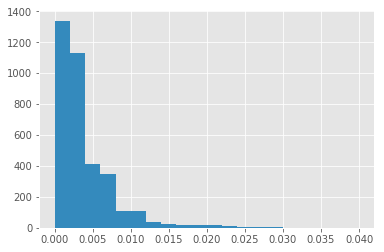

In [100]:
# before_con_first_deri = before_con_first_deri.tolist()
# after_con_first_deri = []
# for i in range(len(before_con_first_deri)):
#     #after_con_first_deri.append(round(i,3))
#     before_con_first_deri[i] = int(before_con_first_deri[i]*1000)/1000
# before_con_first_deri = sorted(before_con_first_deri, reverse=True)
# for j in range( int(len(before_con_first_deri)*0.1) ):
#     before_con_first_deri.pop(0)
# print (len(before_con_first_deri))
# plt.hist(np.abs(before_con_first_deri), 30)

before_con_first_deri = np.abs(before_con_first_deri)
stat = plt.hist(before_con_first_deri, bins = 20)[0] #y
criteria_list = plt.hist(before_con_first_deri, bins = 20)[1] #x
stat_sum = 0
for i in range(len(stat)):
    print (stat[i])
    stat_sum += stat[i]
    if stat_sum > np.sum(stat)*0.9:
        c_slope = criteria_list[i]
        break
print (c_slope)

In [101]:
del_point = np.array(before_con_first_deri>c_slope, dtype = int)
print (del_point)
for i in range(len(del_point)):
    if del_point[i] == 1:
        if i == 0:
            data_before_conv[i] = data_before_conv[i+1]
        elif i == len(del_point)-1:
            data_before_conv[i] = data_before_conv[i-1]
        else:
            data_before_conv[i] = (data_before_conv[i+1]+data_before_conv[i-1])/2

print (before_con_first_deri[before_con_first_deri > c_slope ])

[1 0 1 ... 0 1 1]
[0.012 0.019 0.009 0.017 0.019 0.014 0.009 0.009 0.009 0.009 0.023 0.011
 0.01  0.01  0.01  0.009 0.011 0.024 0.008 0.009 0.009 0.009 0.012 0.01
 0.009 0.01  0.025 0.028 0.012 0.011 0.011 0.012 0.008 0.009 0.011 0.01
 0.015 0.03  0.012 0.01  0.009 0.009 0.008 0.01  0.01  0.013 0.01  0.011
 0.009 0.008 0.022 0.01  0.023 0.012 0.04  0.022 0.019 0.012 0.009 0.012
 0.009 0.009 0.018 0.014 0.012 0.02  0.016 0.015 0.02  0.013 0.017 0.013
 0.013 0.009 0.022 0.011 0.009 0.011 0.01  0.011 0.017 0.014 0.01  0.018
 0.012 0.008 0.012 0.012 0.01  0.009 0.013 0.02  0.025 0.023 0.019 0.012
 0.009 0.012 0.016 0.01  0.013 0.026 0.013 0.01  0.013 0.011 0.009 0.01
 0.013 0.009 0.01  0.009 0.013 0.013 0.013 0.01  0.008 0.011 0.01  0.025
 0.015 0.01  0.009 0.009 0.008 0.017 0.022 0.01  0.01  0.01  0.01  0.009
 0.009 0.009 0.009 0.01  0.009 0.008 0.008 0.021 0.018 0.012 0.01  0.009
 0.01  0.013 0.008 0.022 0.014 0.008 0.009 0.012 0.012 0.01  0.01  0.008
 0.013 0.011 0.016 0.008 0.009 0.01 

In [102]:
np.sum(np.array((datay==data_before_conv), dtype = int))


3237

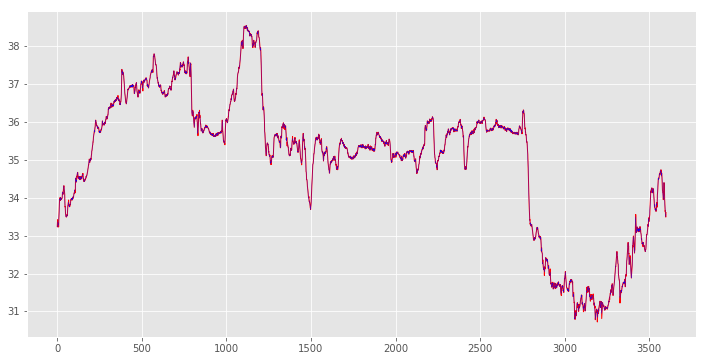

In [103]:
plt.figure(figsize = (12,6))
plt.plot(datay, 'r', lw = 1)
plt.plot(data_before_conv,'b', lw = 0.3)
plt.show()

In [104]:
(datetime.datetime.strptime(str(datax[1]), '%Y-%m-%d %H:%M:%S')
 -datetime.datetime.strptime(str(datax[0]), '%Y-%m-%d %H:%M:%S')).total_seconds()

10.0

In [105]:
print ('yoyo')

yoyo
